# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
X_train.shape, y_train.shape

((404, 13), (404, 1))

In [6]:
X_test.shape, y_test.shape

((102, 13), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
## lin reg with train set
linreg = LinearRegression()  
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
linreg.intercept_

array([35.3764684])

In [10]:
linreg.coef_

array([[-9.26898333e-02,  5.06534584e-02,  2.92620248e-02,
         2.39875566e+00, -1.67995491e+01,  3.64648795e+00,
         1.53492731e-02, -1.39349859e+00,  3.22538352e-01,
        -1.20037646e-02, -8.85769405e-01,  9.33109292e-03,
        -6.33983729e-01]])

In [11]:
y_test_pred = linreg.predict(X_test)

In [12]:
y_train_pred = linreg.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [13]:
from sklearn import metrics

## R2 score for test set
(metrics.r2_score(y_test, y_test_pred)).round(2)

0.74

In [14]:
## R2 score for train set
(metrics.r2_score(y_train, y_train_pred)).round(2)

0.74

## 4. Calculate and print mean squared error for both the training and the testing set.

In [15]:
## MSE score for test set
metrics.mean_squared_error(y_test, y_test_pred)

19.9525665723374

In [16]:
## MSE score for train set
metrics.mean_squared_error(y_train, y_train_pred)

22.763200944872455

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [17]:
## MAE score for test set
metrics.mean_absolute_error(y_test, y_test_pred)

3.2342169012184967

In [18]:
## MAE score for test set
metrics.mean_absolute_error(y_train, y_train_pred)

3.368881726070685

## Classification Model Evaluation

In [19]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [20]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

/home/jelv/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jelv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_train_pred = logreg.predict(X_train)

In [25]:
y_test_pred = logreg.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [26]:
## score for test set
logreg.score(X_train, y_train)

0.975

In [27]:
## score  for train set
logreg.score(X_test, y_test)

1.0

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
## usando func accucary_score
## accuracy_score for train set
accuracy_score(y_train, y_train_pred)

0.975

In [30]:
## accuracy_score for test set
accuracy_score(y_test, y_test_pred)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [31]:
from sklearn.metrics import balanced_accuracy_score

##balanced score for train set
balanced_accuracy_score(y_train, y_train_pred)

0.9736842105263158

In [32]:
##balanced score for train set

balanced_accuracy_score(y_test, y_test_pred)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [33]:
from sklearn.metrics import precision_score

## 11. Calculate and print the recall score for both the training and the testing set.

In [34]:
##precision_score score for train set

precision_score(y_train, y_train_pred, average="weighted")

0.9752021252021251

In [35]:
##precision_score score for test set

precision_score(y_test, y_test_pred, average="weighted")

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [36]:
from sklearn.metrics import f1_score

In [37]:
##f1_score score for train set

f1_score(y_train, y_train_pred, average="weighted")

0.974995670995671

In [38]:
##f1_score score for train set

f1_score(y_test, y_test_pred, average="weighted")

1.0

## 13. Generate confusion matrices for both the training and the testing set.

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

confusion_matrix(y_train, y_train_pred)

array([[44,  0,  0],
       [ 0, 36,  2],
       [ 0,  1, 37]])

In [40]:
## draft de funcion para crear heatmaps de confusion amtrix

def make_confusion_matrix(targets, predictions, color='Blues'):
    """
    colormap default es Blues
    """
    from sklearn.metrics import confusion_matrix
    sns.heatmap(confusion_matrix(targets, predictions)/np.sum(confusion_matrix(targets, predictions)), annot=True, fmt='.2%', cmap=color)
    plt.title(f'accuracy_score: {(accuracy_score(targets, predictions)).round(2)}', fontsize=22, pad=30)
    plt.xlabel("Prediccion", fontsize=18)
    plt.ylabel('Real',fontsize=18);

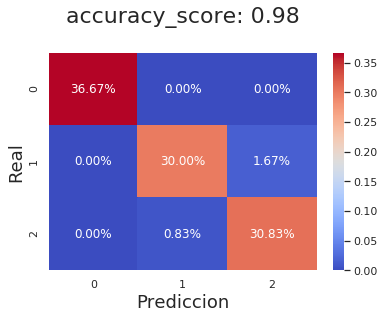

In [41]:
## confusion matrix heatmap for train set
make_confusion_matrix(y_train, y_train_pred, "coolwarm")

In [42]:
confusion_matrix(y_test, y_test_pred)

array([[ 6,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 12]])

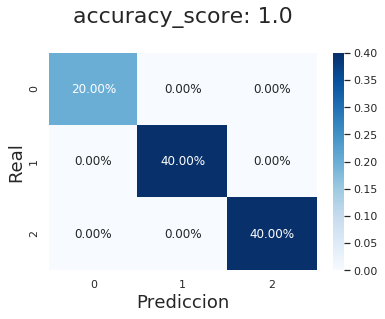

In [43]:
## confusion matrix heatmap for test set

make_confusion_matrix(y_test, y_test_pred)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.